<a href="https://colab.research.google.com/github/victoriaPaez/MujeresDigitales2021/blob/main/Taller_semana_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de pagos a préstamos

## Introducción

**Contexto comercial.** Como analista de un banco se le entrega un conjunto de datos con información de los clientes y si pagaron el crédito o no. Su jefe le pida que entrene algunos modelos para responder la pregunta: si un usuario incurrirá en incumplimiento o no. El algoritmo para predecir la probabilidad de incumplimiento es el núcleo del negocio.

**Problema comercial.** Su tarea es **crear un modelo de clasificación para determinar si un usuario incumplirá con su préstamo o no**.

**Contexto analítico.** Como científico de datos, ahora debe concentrarse en perfeccionar el algoritmo de clasificación. Debe verificar cuantitativamente que el algoritmo funcionará para datos futuros. Además, debe expandir su conjunto de herramientas para no depender únicamente de la regresión logística, ya que tiene algunas deficiencias que se manejan mejor con otros tipos de modelos. 

## Evaluar los diferentes modelos

In [1146]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm

In [1147]:
df = pd.read_csv("Lending_club_cleaned_2.csv")

In [1148]:
df.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


In [1149]:
df.shape

(38705, 10)

In [1150]:
# copiamos el dataframe para no alterar el dataframe original
dfk=df.copy()
dfk.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


## Ejercicio 1

Realice una estandarización de los datos númericos usando el promedio y la desviación estándar esto es: $(datos - promedio) / desviación\ estándar$, para las columnas ```[loan_amnt, int_rate, annual_inc]```. Y para las variables categóricas use one hot encoding ```[home_ownership, purpose, grade, loan_status]```.

Tip: Para las variables categóricas recuerde que puede usar la función de pandas: get_dummies

In [1151]:
# copiamos el dataframe para no alterar el dataframe original
dfN=df.copy()
dfN.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


In [1152]:
#seleccionamos las columas que estamos interesados 
dfN=dfN[['loan_status','annual_inc','int_rate','loan_amnt','home_ownership','purpose','grade']]
dfN.head()

,loan_status,annual_inc,int_rate,loan_amnt,home_ownership,purpose,grade
0,Fully Paid,24000.0,10.65%,5000,RENT,credit_card,B
1,Charged Off,30000.0,15.27%,2500,RENT,car,C
2,Fully Paid,12252.0,15.96%,2400,RENT,small_business,C
3,Fully Paid,49200.0,13.49%,10000,RENT,other,C
4,Fully Paid,80000.0,12.69%,3000,RENT,other,B


In [1153]:
dfN.shape

(38705, 7)

In [1154]:
dfN.dtypes

loan_status        object
annual_inc        float64
int_rate           object
loan_amnt           int64
home_ownership     object
purpose            object
grade              object
dtype: object

In [1155]:
dfN["int_rate"] = dfN["int_rate"].str.rstrip('%').astype('float')

In [1156]:
dfN.describe()

,annual_inc,int_rate,loan_amnt
count,3.870500e+04,38705.000000,38705.000000
mean,6.961750e+04,12.059525,11303.916161
std,6.422378e+04,3.719517,7470.319733
min,4.000000e+03,5.420000,500.000000
25%,4.149600e+04,9.320000,5500.000000
50%,6.000000e+04,11.860000,10000.000000
75%,8.320000e+04,14.590000,15000.000000
max,6.000000e+06,24.590000,35000.000000


In [1157]:
dfN.dtypes

loan_status        object
annual_inc        float64
int_rate          float64
loan_amnt           int64
home_ownership     object
purpose            object
grade              object
dtype: object

In [1158]:
# Encoding las variables categoricas no numericas 
dfN2 = pd.get_dummies(dfN, columns=['purpose', 'grade'], drop_first=False)
dfN2 = pd.get_dummies(dfN2, columns=['home_ownership'], drop_first=True)
dfN2.replace({'loan_status': {"Charged Off":0, "Fully Paid":1},}, inplace=True)
dfN2.head(5)

,loan_status,annual_inc,int_rate,loan_amnt,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,1,24000.0,10.65,5000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,30000.0,15.27,2500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,12252.0,15.96,2400,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,49200.0,13.49,10000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,80000.0,12.69,3000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [1159]:
dfN2.dtypes

loan_status                     int64
annual_inc                    float64
int_rate                      float64
loan_amnt                       int64
purpose_car                     uint8
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_house                   uint8
purpose_major_purchase          uint8
purpose_medical                 uint8
purpose_moving                  uint8
purpose_other                   uint8
purpose_renewable_energy        uint8
purpose_small_business          uint8
purpose_vacation                uint8
purpose_wedding                 uint8
grade_A                         uint8
grade_B                         uint8
grade_C                         uint8
grade_D                         uint8
grade_E                         uint8
grade_F                         uint8
grade_G                         uint8
home_ownership_OTHER            uint8
home_ownersh

In [1160]:
dfN2.describe()

,loan_status,annual_inc,int_rate,loan_amnt,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
count,38705.000000,3.870500e+04,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000,38705.000000
mean,0.859450,6.961750e+04,12.059525,11303.916161,0.038729,0.129363,0.472161,0.008190,0.074590,0.009534,0.054670,0.017310,0.014443,0.099160,0.002454,0.046144,0.009094,0.024157,0.250459,0.302209,0.205090,0.134685,0.072626,0.026741,0.008190,0.002532,0.073505,0.478155
std,0.347562,6.422378e+04,3.719517,7470.319733,0.192950,0.335606,0.499231,0.090129,0.262732,0.097175,0.227338,0.130427,0.119308,0.298881,0.049482,0.209799,0.094931,0.153539,0.433283,0.459221,0.403772,0.341392,0.259525,0.161327,0.090129,0.050256,0.260967,0.499529
min,0.000000,4.000000e+03,5.420000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.149600e+04,9.320000,5500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,6.000000e+04,11.860000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.320000e+04,14.590000,15000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,6.000000e+06,24.590000,35000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1161]:
#Variable de interes:loan_amnt	

In [1162]:
# multiple regression
X = dfN2.drop(['loan_amnt','loan_status'], axis=1)
y = dfN2[['loan_amnt']].values.ravel()

In [1163]:
# Split Train, Validation y Test Data separacion de los datos: entrenamiento 80% y prueba 20%
X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_vali, y_train, y_vali = train_test_split(X_rest, y_rest, test_size=0.20, random_state=0)

In [1164]:
# media de la data de training data
training_mean = X_train.mean()
training_mean

annual_inc                    69335.553540
int_rate                         12.049112
purpose_car                       0.038432
purpose_credit_card               0.131121
purpose_debt_consolidation        0.472771
purpose_educational               0.007630
purpose_home_improvement          0.074482
purpose_house                     0.009164
purpose_major_purchase            0.054459
purpose_medical                   0.017803
purpose_moving                    0.014573
purpose_other                     0.097170
purpose_renewable_energy          0.002503
purpose_small_business            0.047112
purpose_vacation                  0.009164
purpose_wedding                   0.023616
grade_A                           0.252755
grade_B                           0.301885
grade_C                           0.204957
grade_D                           0.131767
grade_E                           0.073069
grade_F                           0.027613
grade_G                           0.007953
home_owners

In [1165]:
#la desviacion de la data de training data
training_std =  X_train.std()
training_std

annual_inc                    59432.563539
int_rate                          3.723274
purpose_car                       0.192241
purpose_credit_card               0.337540
purpose_debt_consolidation        0.499268
purpose_educational               0.087017
purpose_home_improvement          0.262559
purpose_house                     0.095291
purpose_major_purchase            0.226925
purpose_medical                   0.132238
purpose_moving                    0.119840
purpose_other                     0.296195
purpose_renewable_energy          0.049968
purpose_small_business            0.211882
purpose_vacation                  0.095291
purpose_wedding                   0.151854
grade_A                           0.434601
grade_B                           0.459085
grade_C                           0.403679
grade_D                           0.338244
grade_E                           0.260255
grade_F                           0.163864
grade_G                           0.088825
home_owners

In [1166]:
# Centrar la data (algo usual en tecnicas de regularizacion)
X_train = (X_train - training_mean) / training_std # normalizar 
X_vali= (X_vali- training_mean) / training_std # normalizar
X_test = (X_test - training_mean) / training_std # normalizar 

In [1167]:
print("X_train", X_train.shape)
print("X_vali",X_vali.shape)
print("X_test",X_test.shape)

X_train (24771, 26)
X_vali (6193, 26)
X_test (7741, 26)


## Ejercicio 1.1:

Realice una separación de los datos: entrenamiento 80% y prueba 20%

In [1168]:
# Ajustar el modelo a train
#X_train = sm.add_constant(X_train, prepend=True)
model_linear = sm.OLS(y_train, sm.add_constant(X_train))
original_linear = model_linear.fit()
print(original_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     360.9
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:01:31   Log-Likelihood:            -2.5214e+05
No. Observations:               24771   AIC:                         5.043e+05
Df Residuals:                   24746   BIC:                         5.045e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [1173]:
from sklearn import linear_model
# Ajustar el modelo L1 
model_l1 = linear_model.Lasso(alpha=40, fit_intercept=True) # mayor alpha para una mayor regularizacion 
results_l1 = model_l1.fit(X_train, y_train)

In [1174]:
sorted(zip(X_train.columns, results_l1.coef_), key=lambda x: x[1])

[('home_ownership_RENT', -1010.1816738895649),
 ('grade_D', -633.0058303746736),
 ('grade_C', -595.9059027396814),
 ('purpose_other', -511.6503174647843),
 ('purpose_car', -482.27576520801006),
 ('home_ownership_OWN', -347.55266106010316),
 ('purpose_vacation', -312.7175658825738),
 ('purpose_major_purchase', -307.97673354978247),
 ('purpose_moving', -298.34878580899704),
 ('purpose_medical', -198.88731285406638),
 ('purpose_educational', -184.2714111309413),
 ('purpose_renewable_energy', -50.473114052422645),
 ('home_ownership_OTHER', -25.991890269866197),
 ('purpose_home_improvement', 0.0),
 ('purpose_wedding', -0.0),
 ('grade_A', 0.0),
 ('grade_E', -0.0),
 ('grade_B', 18.490856076232028),
 ('grade_G', 109.8322484971815),
 ('grade_F', 137.0359593647962),
 ('purpose_house', 228.96286917650343),
 ('purpose_small_business', 399.7935319780785),
 ('purpose_credit_card', 490.01264034181105),
 ('purpose_debt_consolidation', 1037.7442992873423),
 ('annual_inc', 1715.840658631476),
 ('int_rat

In [1176]:
# Reducir el numero de variables basados en los resultado L1
cols_to_drop = ['grade_E','grade_A','purpose_wedding','purpose_home_improvement']

X_train_simplified = X_train.drop(columns=cols_to_drop)
X_vali_simplified = X_vali.drop(columns=cols_to_drop)
X_test_simplified = X_test.drop(columns=cols_to_drop)

# Para uso futuro hacemos lo mismo en el resto de la data
X_simplified=X.drop(columns=cols_to_drop)
X_rest_simplified=X_rest.drop(columns=cols_to_drop) #recordar X_rest es train+validation set

In [1177]:
# Re ajustar el modelo de multiple linear regression (no regularizacion)
model_linear = sm.OLS(y_train, sm.add_constant(X_train_simplified))
res_linear = model_linear.fit()
print(res_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     392.3
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:03:43   Log-Likelihood:            -2.5215e+05
No. Observations:               24771   AIC:                         5.044e+05
Df Residuals:                   24748   BIC:                         5.045e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [1178]:
# Ajustar el modelo
model_l2 = linear_model.Ridge(alpha=99.8, fit_intercept=True) # mayor alpha para mayor regularizacion
results_l2 = model_l2.fit(X_train_simplified, y_train)

In [1179]:
sorted(zip(X_train_simplified.columns, results_l2.coef_), key=lambda x: x[1])

[('home_ownership_RENT', -1052.6085342444053),
 ('grade_D', -695.1674554023164),
 ('grade_C', -647.0963389531044),
 ('purpose_other', -546.81579970978),
 ('purpose_car', -519.8488130021454),
 ('home_ownership_OWN', -392.8941481212474),
 ('purpose_vacation', -351.12080516698813),
 ('purpose_major_purchase', -343.67243403762535),
 ('purpose_moving', -335.5323538669191),
 ('purpose_medical', -238.2279141659913),
 ('purpose_educational', -221.71128679890427),
 ('purpose_renewable_energy', -91.7540637242258),
 ('home_ownership_OTHER', -67.25862108881513),
 ('grade_B', 37.926257965015935),
 ('grade_G', 131.41824509004144),
 ('grade_F', 146.6526454670742),
 ('purpose_house', 265.51077917861073),
 ('purpose_small_business', 428.72604868421604),
 ('purpose_credit_card', 517.8357690203765),
 ('purpose_debt_consolidation', 1049.1254922089645),
 ('annual_inc', 1728.8048094849948),
 ('int_rate', 2327.5271256862984)]

In [1180]:
# buscar diferentes valores de lambda
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
lambdas = np.arange(0.1, 100.0, 0.1)

coefs = []
mse_train = []
mse_vali = []
for l in lambdas:
    ridge = linear_model.Ridge(alpha=l, fit_intercept=True)
    ridge.fit(X_train_simplified, y_train)
    mse_train.append(mean_squared_error(y_train, ridge.predict(X_train_simplified))) # train data
    mse_vali.append(mean_squared_error(y_vali, ridge.predict(X_vali_simplified))) # validation data

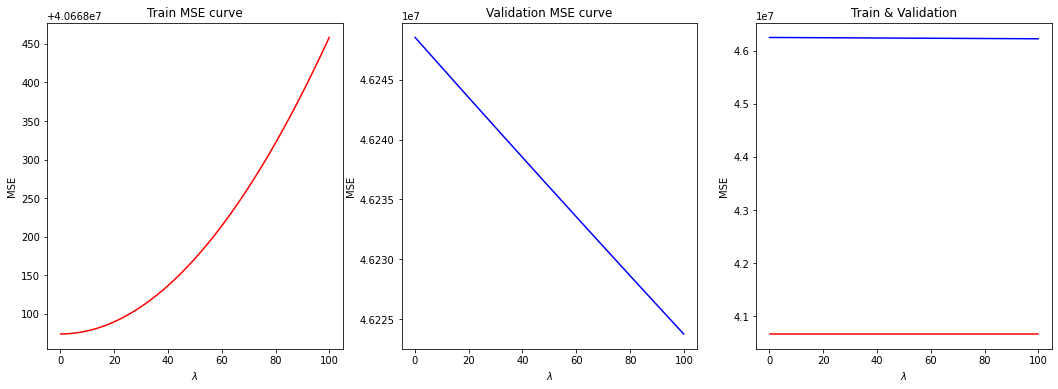

In [1181]:
# Graficar los resultados
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1,3,figsize=(18,6))

ax1[0].plot(lambdas, mse_train, 'r-')
ax1[0].set_title('Train MSE curve')

ax1[1].plot(lambdas, mse_vali, 'b-')
ax1[1].set_title('Validation MSE curve')

#Poner dos figuras en la misma 
ax1[2].plot(lambdas, mse_train, 'r-')
ax1[2].plot(lambdas, mse_vali, 'b-')
ax1[2].set_title('Train & Validation')

for ax in ax1.flat:
    ax.set_xlabel('$\lambda$')
    ax.set_ylabel('MSE')
        
plt.show()

In [1145]:
min_index=mse_vali.index(min(mse_vali))
print("The optimal lambda is: ", lambdas[min_index])
print("Validation MSE=",mse_vali[min_index])
print("Train MSE=", mse_train[min_index])

The optimal lambda is:  99.9
Validation MSE= 46171349.57583807
Train MSE= 40631404.41155212


SE ESTIMA EL MEJOR $\lambda$.

In [1182]:

from sklearn.model_selection import train_test_split, KFold
kf=KFold(n_splits=10,random_state=0)

MSE_total=[]
for index_train, index_test in kf.split(X_rest_simplified):
    
    #Extraer la data en folds
    X_train_fold, y_train_fold=X_rest_simplified.iloc[index_train], y_rest[index_train]
    X_test_fold, y_test_fold=X_rest_simplified.iloc[index_test], y_rest[index_test]
    
    #Normalizar la data:
    training_fold_mean = X_train_fold.mean()
    training_fold_std =  X_train_fold.std()
    X_train_fold = (X_train_fold - training_fold_mean) / training_fold_std # normalizar
    X_test_fold = (X_test_fold - training_fold_mean) / training_fold_std # normalizar
   
    MSE_fold=[]

    for l in lambdas:
        ridge = linear_model.Ridge(alpha=l, fit_intercept=True)
        ridge.fit(X_train_fold, y_train_fold)
        
        #Calcular el MSE para la test data
        MSE_fold.append(mean_squared_error(y_test_fold, ridge.predict(X_test_fold)))
    
    MSE_total.append(MSE_fold)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Text(0.5, 1.0, 'Mean MSE curve')

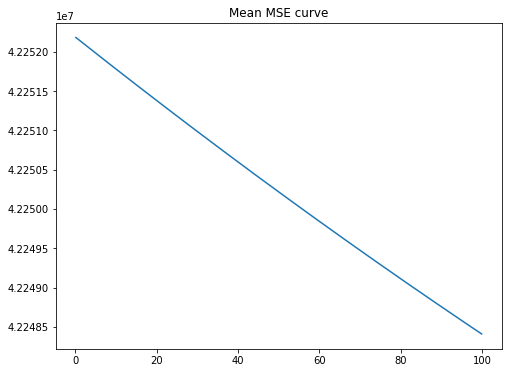

In [1183]:
#la media para cada lambda:

MSE_lambdas=np.matrix(MSE_total).mean(0).reshape(999,1)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(lambdas, MSE_lambdas)
ax.set_title('Mean MSE curve')

In [1184]:
min_index=np.argmin(MSE_lambdas)
print("The optimal lambda is: ", lambdas[min_index])
print("Average MSE is:", min(MSE_lambdas))

The optimal lambda is:  99.9
Average MSE is: [[42248408.67167707]]


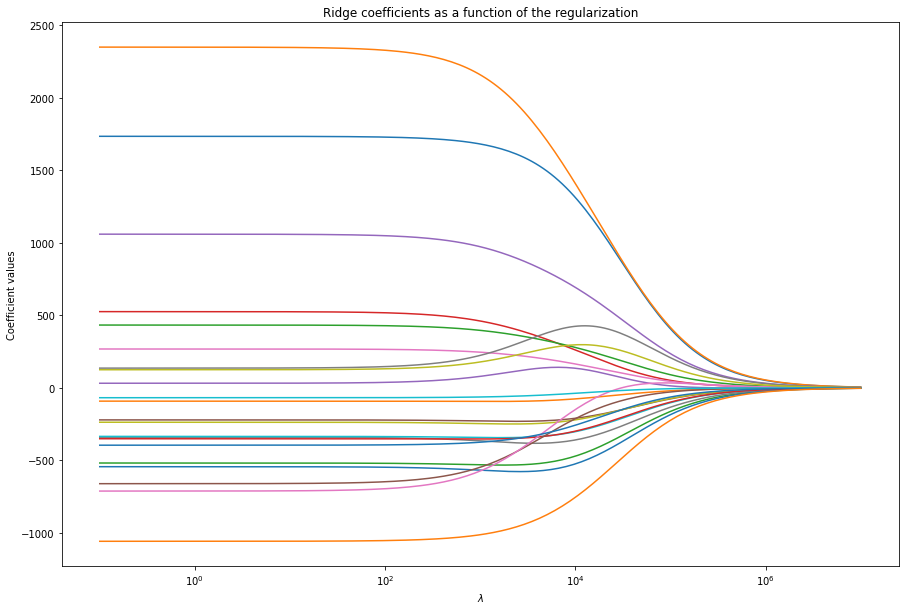

In [1185]:
# ciclo para multiples valores de lambda y guardar los coeficientes ajustados
lambdas = np.logspace(-1, 7, 200)

coefs = []
for l in lambdas:
    ridge = linear_model.Ridge(alpha=l, fit_intercept=True)
    ridge.fit(X_train_simplified, y_train)
    coefs.append(ridge.coef_)

fig,ax = plt.subplots(figsize=(15,10))
ax.plot(lambdas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel('$\lambda$')
plt.ylabel("Coefficient values")
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()
#plt.savefig('ridge_coef_plot.png', bbox_inches='tight')

In [1186]:
# Ciclo para diferentes valores de alpha y guardar coeficientes ajustados
alpha_list = np.logspace(-5, 1, 99)

coefs = []
for a in alpha_list:
    enet = linear_model.ElasticNet(random_state=0, alpha=a, l1_ratio=0.5, fit_intercept=True)
    enet.fit(X_train_simplified, y_train)
    coefs.append(enet.coef_.ravel())

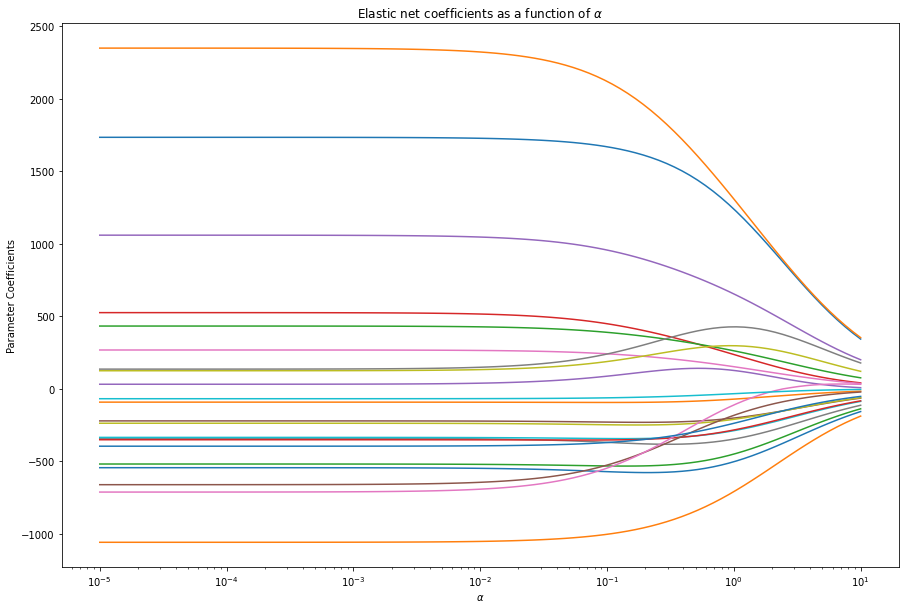

In [1187]:
# Graficar 
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(alpha_list, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel(r'$\alpha$')
plt.ylabel('Parameter Coefficients')
plt.title(r'Elastic net coefficients as a function of $\alpha$')
plt.axis('tight');

In [1188]:
# Comparar la progresion de los errores de train y test errors a medida que varia alpha
alphas = np.logspace(-5, 1, 99)
enet = linear_model.ElasticNet(random_state=0, l1_ratio=0.5, fit_intercept=True)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train_simplified, y_train)
    train_errors.append(enet.score(X_train_simplified, y_train))
    test_errors.append(enet.score(X_vali_simplified, y_vali))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal alpha regularization parameter : %.6f" % alpha_optim)

# Estimar los coef_ de toda la data con parametros de regularizacion optimos
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_

Optimal alpha regularization parameter : 0.686649


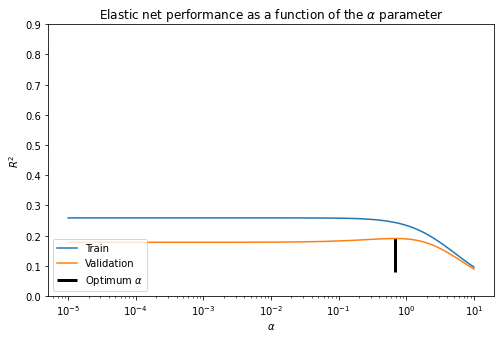

In [1189]:
# Graficar el R-squared como funcion de 
fig,ax = plt.subplots(figsize=(8,5))
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Validation')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',linewidth=3, label=r'Optimum $\alpha$')
plt.legend(loc='lower left')
plt.ylim([0, 0.9])
plt.title(r'Elastic net performance as a function of the $\alpha$ parameter')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$');

In [1190]:
# Compare la progresión del tren y los errores de prueba y el alfa y el rho varían
alphas = np.logspace(-5, 1, 99)
rhos = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
list_alpha_optim = []
for rho in rhos:
    train_errors = []
    test_errors = []
    enet = linear_model.ElasticNet(random_state=0, l1_ratio=0.5, fit_intercept=True)
    for alpha in alphas:
        enet.set_params(alpha=alpha, l1_ratio=rho)
        enet.fit(X_train_simplified, y_train)
        train_errors.append(enet.score(X_train_simplified, y_train))
        test_errors.append(enet.score(X_vali_simplified, y_vali))

    i_alpha_optim = np.argmax(test_errors)
    alpha_optim = alphas[i_alpha_optim]
    print("Optimal alpha for rho = %.6f: %.6f" % (rho, alpha_optim))
    list_alpha_optim.append(alpha_optim)

Optimal alpha for rho = 0.100000: 0.390694
Optimal alpha for rho = 0.200000: 0.449843
Optimal alpha for rho = 0.300000: 0.517947
Optimal alpha for rho = 0.400000: 0.596362
Optimal alpha for rho = 0.500000: 0.686649
Optimal alpha for rho = 0.600000: 0.790604
Optimal alpha for rho = 0.700000: 1.206793
Optimal alpha for rho = 0.800000: 1.599859
Optimal alpha for rho = 0.900000: 3.237458


In [1191]:
# Mirar los coeficientes del modelo final
final_elastic_net_model = linear_model.ElasticNet(random_state=0, alpha= 0.686649, l1_ratio=0.5, fit_intercept=True)
final_elastic_net_model.fit(X_train_simplified, y_train)
sorted(zip(X_train_simplified.columns, final_elastic_net_model.coef_), key=lambda x: x[1])

[('home_ownership_RENT', -786.2301275055983),
 ('purpose_other', -537.4178913045395),
 ('purpose_car', -483.71611794066706),
 ('purpose_major_purchase', -366.3612988142102),
 ('purpose_moving', -310.493202350886),
 ('purpose_vacation', -307.800702723084),
 ('home_ownership_OWN', -270.9551774964457),
 ('grade_C', -236.1857566024137),
 ('purpose_medical', -226.91226830481978),
 ('purpose_educational', -214.57253220838456),
 ('grade_D', -180.12231230183812),
 ('purpose_renewable_energy', -78.94291911121796),
 ('home_ownership_OTHER', -39.90927597910525),
 ('grade_B', 139.30872511294757),
 ('purpose_house', 172.97662074606765),
 ('purpose_credit_card', 278.8547971754863),
 ('purpose_small_business', 290.18014563077384),
 ('grade_G', 293.721411354801),
 ('grade_F', 417.93130769955684),
 ('purpose_debt_consolidation', 720.1683230447402),
 ('annual_inc', 1362.4066311213319),
 ('int_rate', 1481.8554754521813)]

In [1192]:
#calcular el performace usando el MSE: 
print("OLS MSE:", mean_squared_error(y_test, res_linear.predict(sm.add_constant(X_test_simplified))))
print("Ridge MSE:", mean_squared_error(y_test, model_l2.predict(X_test_simplified)))
print("Elastic Net MSE:", mean_squared_error(y_test, final_elastic_net_model.predict(X_test_simplified)))

OLS MSE: 42239726.910648145
Ridge MSE: 42251980.662217
Elastic Net MSE: 43736389.806054905


## Ejercicio 2:

Entrene 3 modelos para predecir si un cliente pagará el crédito o no:
1. Regresión logística
2. Árbol aleatorio (random forest)
3. KNN (vecinos mas cercanos)

## Ejercicio 3:

Compare los tres modelos anteriores usando la métrica precisión. Recuerde que la fórmula es: $VP/(VP+FP)$

Donde:


VP: Verdaderos positivos

FP: Falsos positivos

# Ejercicio 2 Regresión logística 

In [1193]:
# Listos para una multiple regression
#X = dfN2.drop(['loan_status'], axis=1)
X = dfN2[['loan_amnt']]
y = dfN2[['loan_status']]

In [1194]:
X

,loan_amnt
0,5000
1,2500
2,2400
3,10000
4,3000
...,...
38700,2500
38701,8500
38702,5000
38703,5000


In [1195]:
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
38700,1
38701,1
38702,1
38703,1


In [1196]:
#Entrenamos un modelo de regresión logística
#importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression

In [1197]:
# Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

In [1198]:
#Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1199]:
X_nuevo = np.array([2500,5000, 8500, 10000,3000,750,120000,30000,75000,3500,500]).reshape(-1,1)

In [1200]:
# Usa el modelo entrenado para obtener las predicciones con datos nuevos

prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

[1 1 1 1 1 1 0 1 1 1 1]


In [1201]:
#obtenemos las probabilidades de la predicción
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
print(probabilidades_prediccion)

[[0.12027294 0.87972706]
 [0.1255185  0.8744815 ]
 [0.13319039 0.86680961]
 [0.13659805 0.86340195]
 [0.12130668 0.87869332]
 [0.11671456 0.88328544]
 [0.57386746 0.42613254]
 [0.18931356 0.81068644]
 [0.35929754 0.64070246]
 [0.12234808 0.87765192]
 [0.11621374 0.88378626]]


In [1202]:
# Como seguramente estamos más interesados en la probabilidad de aprobar, podemos centrarnos en la segunda columna
print(probabilidades_prediccion[:,1])

[0.87972706 0.8744815  0.86680961 0.86340195 0.87869332 0.88328544
 0.42613254 0.81068644 0.64070246 0.87765192 0.88378626]


In [1203]:
intercepto=regresion_logistica.intercept_
intercepto[0]

2.0385181995167607

In [1204]:
beta1=regresion_logistica.coef_
beta1[0][0]

-1.9468051882719665e-05

In [1205]:
X1=dfN2['loan_amnt'].unique()

In [1206]:
import pandas as pd
dfu= pd.DataFrame()
dfu['X']=X1
dfu['X_predicho']=dfu['X']*beta1[0][0]+ intercepto[0] # Calculo de los valores de X para la funcion Sigmoide
dfu['Probabilidades']=1/(1+np.exp(-dfu.X_predicho)) # Calculo de probabilidades 
dfu

,X,X_predicho,Probabilidades
0,5000,1.941178,0.874481
1,2500,1.989848,0.879727
2,2400,1.991795,0.879933
3,10000,1.843838,0.863402
4,3000,1.980114,0.878693
...,...,...,...
875,800,2.022944,0.883185
876,10325,1.837511,0.862654
877,13025,1.784947,0.856307
878,22350,1.603407,0.832494


In [1207]:
dfu.describe()

,X,X_predicho,Probabilidades
count,880.000000,880.000000,880.000000
mean,13515.937500,1.775389,0.853927
std,8452.775921,0.164559,0.021118
min,500.000000,1.357136,0.795294
25%,6568.750000,1.662298,0.840546
50%,12287.500000,1.799305,0.858064
75%,19325.000000,1.910637,0.871091
max,35000.000000,2.028784,0.883786


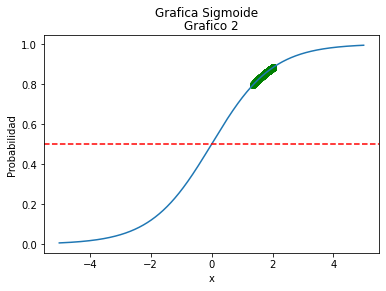

In [1208]:
import matplotlib.pyplot as plt
import math
def sigmoid(x):
  a=[]
  for item in x:
    a.append(1/(1+math.exp(-item)))
  return a
x= np.arange(-5,5,0.01)
sig=sigmoid(x)
plt.plot(x,sig)
plt.axhline(y=0.5, color='r',linestyle='--')
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.title('Grafico 2')
plt.suptitle('Grafica Sigmoide')
plt.scatter(dfu.X_predicho,dfu.Probabilidades,color='g')

In [1209]:
#SE TIENE APROXIMADAMENTE UN 88% DE FACTIBILIDAD QUE LOS CLIENTES PAGARAN LOS CREDITOS

# EJERCICIO 3 Regresión logística  - métrica precisión.

In [1225]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [1226]:
df

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B
...,...,...,...,...,...,...,...,...,...,...
38700,Fully Paid,110000.0,Not Verified,4 years,MORTGAGE,8.07%,2500,home_improvement,36 months,A
38701,Fully Paid,18000.0,Not Verified,3 years,RENT,10.28%,8500,credit_card,36 months,C
38702,Fully Paid,100000.0,Not Verified,< 1 year,MORTGAGE,8.07%,5000,debt_consolidation,36 months,A
38703,Fully Paid,200000.0,Not Verified,< 1 year,MORTGAGE,7.43%,5000,other,36 months,A


In [1227]:
wu=df.copy()
wu.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


In [1228]:
#seleccionamos las columas que estamos interesados  
wu=wu[['loan_status','annual_inc','int_rate','loan_amnt','home_ownership']]
wu.head()

,loan_status,annual_inc,int_rate,loan_amnt,home_ownership
0,Fully Paid,24000.0,10.65%,5000,RENT
1,Charged Off,30000.0,15.27%,2500,RENT
2,Fully Paid,12252.0,15.96%,2400,RENT
3,Fully Paid,49200.0,13.49%,10000,RENT
4,Fully Paid,80000.0,12.69%,3000,RENT


In [1229]:
wu["int_rate"] = wu["int_rate"].str.rstrip('%').astype('float')

In [1230]:
wu = pd.get_dummies(wu, columns=['home_ownership'], drop_first=True)
wu.replace({'loan_status': {"Charged Off":0, "Fully Paid":1},}, inplace=True)
wu.head(5)

,loan_status,annual_inc,int_rate,loan_amnt,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,1,24000.0,10.65,5000,0,0,1
1,0,30000.0,15.27,2500,0,0,1
2,1,12252.0,15.96,2400,0,0,1
3,1,49200.0,13.49,10000,0,0,1
4,1,80000.0,12.69,3000,0,0,1


In [1231]:
#seleccionamos las columas que estamos interesados  
wun=wu[['loan_status','annual_inc','int_rate','loan_amnt']]
wun.head()

,loan_status,annual_inc,int_rate,loan_amnt
0,1,24000.0,10.65,5000
1,0,30000.0,15.27,2500
2,1,12252.0,15.96,2400
3,1,49200.0,13.49,10000
4,1,80000.0,12.69,3000


In [1236]:
X1 =wun[['loan_amnt',	'annual_inc','int_rate']]
y1 =wun[['loan_status']]


In [1237]:
regresion_logistica.fit(X1,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1238]:
X1

,loan_amnt,annual_inc,int_rate
0,5000,24000.0,10.65
1,2500,30000.0,15.27
2,2400,12252.0,15.96
3,10000,49200.0,13.49
4,3000,80000.0,12.69
...,...,...,...
38700,2500,110000.0,8.07
38701,8500,18000.0,10.28
38702,5000,100000.0,8.07
38703,5000,200000.0,7.43


In [1239]:
y1

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
38700,1
38701,1
38702,1
38703,1


In [1240]:
regresion_logistica.predict(X1)[:5]

array([1, 1, 1, 1, 1])

In [1241]:
from sklearn.metrics import precision_score
precision_score(y1, regresion_logistica.predict(X1))

0.8594496835034233

In [1242]:
#CON LA METRICA DE PRESICION SE TIENE APROXIMADAMENTE UN 86% DE FACTIBILIDAD QUE LOS CLIENTES PAGARAN LOS CREDITOS

#Ejercicio 2 Árbol aleatorio (random forest) 

In [1243]:
#Carga de las librerías
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [1244]:
dfN2.head(5)

,loan_status,annual_inc,int_rate,loan_amnt,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,1,24000.0,10.65,5000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,30000.0,15.27,2500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,12252.0,15.96,2400,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,49200.0,13.49,10000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,80000.0,12.69,3000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [1245]:
dfN2.shape

(38705, 28)

In [1246]:
dfN2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38705 entries, 0 to 38704
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_status                 38705 non-null  int64  
 1   annual_inc                  38705 non-null  float64
 2   int_rate                    38705 non-null  float64
 3   loan_amnt                   38705 non-null  int64  
 4   purpose_car                 38705 non-null  uint8  
 5   purpose_credit_card         38705 non-null  uint8  
 6   purpose_debt_consolidation  38705 non-null  uint8  
 7   purpose_educational         38705 non-null  uint8  
 8   purpose_home_improvement    38705 non-null  uint8  
 9   purpose_house               38705 non-null  uint8  
 10  purpose_major_purchase      38705 non-null  uint8  
 11  purpose_medical             38705 non-null  uint8  
 12  purpose_moving              38705 non-null  uint8  
 13  purpose_other               387

In [1247]:
dfN2.isnull().sum()

loan_status                   0
annual_inc                    0
int_rate                      0
loan_amnt                     0
purpose_car                   0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_house                 0
purpose_major_purchase        0
purpose_medical               0
purpose_moving                0
purpose_other                 0
purpose_renewable_energy      0
purpose_small_business        0
purpose_vacation              0
purpose_wedding               0
grade_A                       0
grade_B                       0
grade_C                       0
grade_D                       0
grade_E                       0
grade_F                       0
grade_G                       0
home_ownership_OTHER          0
home_ownership_OWN            0
home_ownership_RENT           0
dtype: int64

In [1248]:
X = dfN2.drop(['loan_status'], axis=1)
y = dfN2[['loan_status']]

In [1249]:
X

,annual_inc,int_rate,loan_amnt,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,24000.0,10.65,5000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,30000.0,15.27,2500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,12252.0,15.96,2400,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,49200.0,13.49,10000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,80000.0,12.69,3000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38700,110000.0,8.07,2500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
38701,18000.0,10.28,8500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
38702,100000.0,8.07,5000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
38703,200000.0,7.43,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1250]:
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
38700,1
38701,1
38702,1
38703,1


In [1251]:
#Separamos en train y test!
(X_train, X_test,y_train, y_test) = train_test_split(X,y,stratify=y,test_size=0.30,random_state=42)

In [1252]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [1253]:
X_test

,annual_inc,int_rate,loan_amnt,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
17244,75000.0,10.74,7000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
26652,51000.0,11.49,25000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2384,65000.0,16.77,12000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21708,50000.0,6.91,5000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
26351,46000.0,11.86,6000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23941,42000.0,16.32,2000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4629,26400.0,12.69,13200,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5895,90000.0,6.03,6000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5607,61651.0,17.58,15000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1254]:
y_test

,loan_status
17244,1
26652,1
2384,1
21708,1
26351,1
...,...
23941,0
4629,1
5895,1
5607,1


In [1255]:
y_test_pred = tree.predict(X_test) #Prediccion en Test
y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [1256]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7610230795728556


In [1257]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=42, n_estimators=100,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [1258]:
y_test_pred = model.predict(X_test) #Prediccion en Test
y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [1259]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8467964174991388


In [1260]:
#CON ACCURACY SE TIENE APROXIMADAMENTE UN 85% DE FACTIBILIDAD QUE LOS CLIENTES PAGARAN LOS CREDITOS

# Ejercicio 3: Árbol aleatorio (random forest) - métrica precisión.

In [1261]:
from sklearn.metrics import precision_score
test_score =precision_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_score)

% de aciertos sobre el set de evaluación: 0.8627797929753163


In [1262]:
#CON LA METRICA DE PRESICION SE TIENE APROXIMADAMENTE UN 86% DE FACTIBILIDAD QUE LOS CLIENTES PAGARAN LOS CREDITOS

# Ejercicio 2 KNN (vecinos mas cercanos)

In [823]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [824]:
# copiamos el dataframe para no alterar el dataframe original
dfk=df.copy()
dfk.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


In [825]:
#seleccionamos las columas que estamos interesados 
dfkn=dfk[['loan_status','annual_inc','int_rate','loan_amnt']]
dfkn.head()

,loan_status,annual_inc,int_rate,loan_amnt
0,Fully Paid,24000.0,10.65%,5000
1,Charged Off,30000.0,15.27%,2500
2,Fully Paid,12252.0,15.96%,2400
3,Fully Paid,49200.0,13.49%,10000
4,Fully Paid,80000.0,12.69%,3000


In [826]:
dfkn["int_rate"] = dfkn["int_rate"].str.rstrip('%').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [827]:
dfkn

,loan_status,annual_inc,int_rate,loan_amnt
0,Fully Paid,24000.0,10.65,5000
1,Charged Off,30000.0,15.27,2500
2,Fully Paid,12252.0,15.96,2400
3,Fully Paid,49200.0,13.49,10000
4,Fully Paid,80000.0,12.69,3000
...,...,...,...,...
38700,Fully Paid,110000.0,8.07,2500
38701,Fully Paid,18000.0,10.28,8500
38702,Fully Paid,100000.0,8.07,5000
38703,Fully Paid,200000.0,7.43,5000


In [828]:
punto_nuevo = {'loan_amnt': [1000,3450,3210],
               'annual_inc': [500,22000,1800],
               'int_rate': [7.4,9.4,3.4]}

In [829]:
punto_nuevo = pd.DataFrame(punto_nuevo)
punto_nuevo

,loan_amnt,annual_inc,int_rate
0,1000,500,7.4
1,3450,22000,9.4
2,3210,1800,3.4


In [830]:
dfkn.loc[dfkn['loan_status'] == 'Fully Paid', 'loan_amnt']

0         5000
2         2400
3        10000
4         3000
5         5000
         ...  
38700     2500
38701     8500
38702     5000
38703     5000
38704     7500
Name: loan_amnt, Length: 33265, dtype: int64

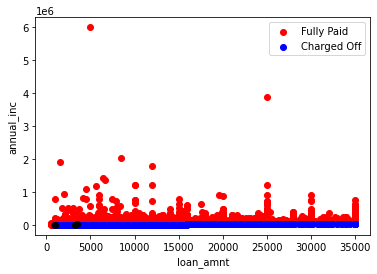

In [831]:
ax = plt.axes()

ax.scatter(dfkn.loc[dfkn['loan_status'] == 'Fully Paid', 'loan_amnt'],df.loc[df['loan_status'] == 'Fully Paid', 'annual_inc'],c="red",label="Fully Paid")
ax.scatter(dfkn.loc[dfkn['loan_status'] == 'Charged Off', 'loan_amnt'],df.loc[df['loan_status'] == 'Charged Off', 'loan_amnt'],c="blue",label="Charged Off")
ax.scatter(punto_nuevo['loan_amnt'],punto_nuevo['annual_inc'],c="black")
plt.xlabel("loan_amnt")
plt.ylabel("annual_inc")
ax.legend()
plt.show()

In [832]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=3)
X = dfkn[['loan_amnt',	'annual_inc','int_rate']]
y = dfkn[['loan_status']]

knn.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [833]:
prediccion = knn.predict(punto_nuevo) 
print(prediccion)

['Fully Paid' 'Fully Paid' 'Fully Paid']


# EJERCICIO 3 KNN (vecinos mas cercanos) - métrica precisión.

Ejercicio 3:
Compare los tres modelos anteriores usando la métrica precisión. Recuerde que la fórmula es:  VP/(VP+FP) 

Donde:

VP: Verdaderos positivos

FP: Falsos positivos

In [1263]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [1264]:
w=df.copy()
w.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


In [1265]:
#seleccionamos las columas que estamos interesados  
w=w[['loan_status','annual_inc','int_rate','loan_amnt','home_ownership']]
w.head()

,loan_status,annual_inc,int_rate,loan_amnt,home_ownership
0,Fully Paid,24000.0,10.65%,5000,RENT
1,Charged Off,30000.0,15.27%,2500,RENT
2,Fully Paid,12252.0,15.96%,2400,RENT
3,Fully Paid,49200.0,13.49%,10000,RENT
4,Fully Paid,80000.0,12.69%,3000,RENT


In [1266]:
w["int_rate"] = w["int_rate"].str.rstrip('%').astype('float')


In [1267]:
w = pd.get_dummies(w, columns=['home_ownership'], drop_first=True)
w.replace({'loan_status': {"Charged Off":0, "Fully Paid":1},}, inplace=True)
w.head(5)

,loan_status,annual_inc,int_rate,loan_amnt,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,1,24000.0,10.65,5000,0,0,1
1,0,30000.0,15.27,2500,0,0,1
2,1,12252.0,15.96,2400,0,0,1
3,1,49200.0,13.49,10000,0,0,1
4,1,80000.0,12.69,3000,0,0,1


In [1268]:
#seleccionamos las columas que estamos interesados  
wn=w[['loan_status','annual_inc','int_rate','loan_amnt']]
wn.head()

,loan_status,annual_inc,int_rate,loan_amnt
0,1,24000.0,10.65,5000
1,0,30000.0,15.27,2500
2,1,12252.0,15.96,2400
3,1,49200.0,13.49,10000
4,1,80000.0,12.69,3000


In [1269]:
from sklearn.neighbors import KNeighborsClassifier 

knn1 = KNeighborsClassifier(n_neighbors=3)
X =wn[['loan_amnt',	'annual_inc','int_rate']]
y =wn[['loan_status']]
knn1.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [1270]:
X

,loan_amnt,annual_inc,int_rate
0,5000,24000.0,10.65
1,2500,30000.0,15.27
2,2400,12252.0,15.96
3,10000,49200.0,13.49
4,3000,80000.0,12.69
...,...,...,...
38700,2500,110000.0,8.07
38701,8500,18000.0,10.28
38702,5000,100000.0,8.07
38703,5000,200000.0,7.43


In [1271]:
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
38700,1
38701,1
38702,1
38703,1


In [1272]:
knn1.predict(X)[:5]

array([1, 1, 1, 1, 1])

In [1273]:
from sklearn.metrics import precision_score
precision_score(y, knn1.predict(X))

0.8956854328325353

In [1274]:
#CON LA METRICA DE PRESICION SE TIENE APROXIMADAMENTE UN 89% DE FACTIBILIDAD QUE LOS CLIENTES PAGARAN LOS CREDITOS

# Ejercicio 3:
como podemos observar con vecinos mas cercanos KNN tenemos una metrica de presicion del 89 %, en conclusion podemos asegurar que entre un 86 % y un 89% de los clientes pagaran los creditos

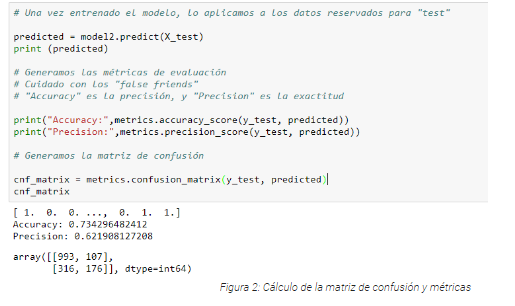

## Ejercicio 4: (Opcional)

Usando la función `RandomizedSearchCV` busque el número de vecinos mas cercanos (k) que mejor prediga el conjunto de datos. Use los siguientes valores: `n_neighbors: entre 1 y 8`, `cross validation: 10` y ``scoring: 'precision'``

In [ ]:
# Escriba aquí su código


## Ejercicio 5: (Opcional)

Extraiga el valor de precisión del modelo optimizado en el ejercicio 4.

In [ ]:
# Escriba aquí su código
